# **Comprehensive Analysis of NBA Team Performance through Extrapolation and Linear Regression for Predictive Modeling**


#Results and Data Commentary

In [ ]:
%pip install nba_api
# %pip install plotly

In [ ]:
import numpy as np
import pandas as pd

Each team is assigned a unique team ID.


In [ ]:
#The name of the teams and their corresponding IDs associated with by the NBA api library. It is stored in a dictionary such that we could access the data of the teams without knowning their IDs
teams = {
        "Atlanta Hawks": 1610612737,
        "Boston Celtics":1610612738,
        "Brooklyn Nets": 1610612751,
        "Charlotte Hornets": 1610612766,
        "Charlotte Bobcats": 1610612766,
        "Chicago Bulls": 1610612741,
        "Cleveland Cavaliers": 1610612739,
        "Dallas Mavericks": 1610612742,
        "Denver Nuggets": 1610612743,
        "Detroit Pistons": 1610612765,
        "Golden State Warriors": 1610612744,
        "Houston Rockets": 1610612745,
        "Indiana Pacers": 1610612754,
        "LA Clippers": 1610612746,
        "Los Angeles Clippers": 1610612746,
        "Los Angeles Lakers": 1610612747,
        "Memphis Grizzlies": 1610612763,
        "Miami Heat": 1610612748,
        "Milwaukee Bucks": 1610612749,
        "Minnesota Timberwolves": 1610612750,
        "New Jersey Nets": 1610612751,
        "New Orleans Hornets": 1610612740,
        "New Orleans Pelicans": 1610612740,
        "New York Knicks": 1610612752,
        "Oklahoma City Thunder": 1610612760,
        "Orlando Magic": 1610612753,
        "Philadelphia 76ers": 1610612755,
        "Phoenix Suns": 1610612756,
        "Portland Trail Blazers": 1610612757,
        "Sacramento Kings": 1610612758,
        "San Antonio Spurs": 1610612759,
        "Toronto Raptors": 1610612761,
        "Utah Jazz": 1610612762,
        "Washington Wizards": 1610612764,
    }

The playoffData contains team rankings from season 2010-2011 to 2020-2021.

In [ ]:

# Actual Playoff Results different from Playoff Ranking

# 1 - Champions
# 2 - Finalist
# 3-4 - Conference Finalists
# 5-8 - Conference Semifinalist
# 9-16 - Conference Quarterfinalist
playoffData = [
  ('2010-11', 1, 'Dallas Mavericks'),
  ('2010-11', 2, 'Miami Heat'),
  ('2010-11', 3.5, 'Chicago Bulls'),
  ('2010-11', 3.5, 'Oklahoma City Thunder'),
  ('2010-11', 6.5, 'Atlanta Hawks'),
  ('2010-11', 6.5, 'Boston Celtics'),
  ('2010-11', 6.5, 'Memphis Grizzlies'),
  ('2010-11', 6.5, 'Los Angeles Lakers'),
  ('2010-11', 12.5, 'Orlando Magic'),
  ('2010-11', 12.5, 'Philadelphia 76ers'),
  ('2010-11', 12.5, 'Indiana Pacers'),
  ('2010-11', 12.5, 'New York Knicks'),
  ('2010-11', 12.5, 'Portland Trail Blazers'),
  ('2010-11', 12.5, 'Denver Nuggets'),
  ('2010-11', 12.5, 'New Orleans Hornets'),
  ('2010-11', 12.5, 'San Antonio Spurs'),
  ('2011-12', 1, 'Miami Heat'),
  ('2011-12', 2, 'Oklahoma City Thunder'),
  ('2011-12', 3.5, 'San Antonio Spurs'),
  ('2011-12', 3.5, 'Boston Celtics'),
  ('2011-12', 6.5, 'Indiana Pacers'),
  ('2011-12', 6.5, 'Philadelphia 76ers'),
  ('2011-12', 6.5, 'Los Angeles Lakers'),
  ('2011-12', 6.5, 'Los Angeles Clippers'),
  ('2011-12', 12.5, 'Chicago Bulls'),
  ('2011-12', 12.5, 'Atlanta Hawks'),
  ('2011-12', 12.5, 'Orlando Magic'),
  ('2011-12', 12.5, 'Denver Nuggets'),
  ('2011-12', 12.5, 'Dallas Mavericks'),
  ('2011-12', 12.5, 'Utah Jazz'),
  ('2011-12', 12.5, 'New York Knicks'),
  ('2011-12', 12.5, 'Memphis Grizzlies'),
  ('2012-13', 1, 'Miami Heat'),
  ('2012-13', 2, 'San Antonio Spurs'),
  ('2012-13', 3.5, 'Indiana Pacers'),
  ('2012-13', 3.5, 'Memphis Grizzlies'),
  ('2012-13', 6.5, 'Oklahoma City Thunder'),
  ('2012-13', 6.5, 'Chicago Bulls'),
  ('2012-13', 6.5, 'New York Knicks'),
  ('2012-13', 6.5, 'Golden State Warriors'),
  ('2012-13', 12.5, 'Brooklyn Nets'),
  ('2012-13', 12.5, 'Atlanta Hawks'),
  ('2012-13', 12.5, 'Houston Rockets'),
  ('2012-13', 12.5, 'Denver Nuggets'),
  ('2012-13', 12.5, 'Los Angeles Clippers'),
  ('2012-13', 12.5, 'Milwaukee Bucks'),
  ('2012-13', 12.5, 'Boston Celtics'),
  ('2012-13', 12.5, 'Los Angeles Lakers'),
  ('2013-14', 1, 'San Antonio Spurs'),
  ('2013-14', 2, 'Miami Heat'),
  ('2013-14', 3.5, 'Oklahoma City Thunder'),
  ('2013-14', 3.5, 'Indiana Pacers'),
  ('2013-14', 6.5, 'Brooklyn Nets'),
  ('2013-14', 6.5, 'Portland Trail Blazers'),
  ('2013-14', 6.5, 'Los Angeles Clippers'),
  ('2013-14', 6.5, 'Washington Wizards'),
  ('2013-14', 12.5, 'Dallas Mavericks'),
  ('2013-14', 12.5, 'Charlotte Bobcats'),
  ('2013-14', 12.5, 'Toronto Raptors'),
  ('2013-14', 12.5, 'Houston Rockets'),
  ('2013-14', 12.5, 'Atlanta Hawks'),
  ('2013-14', 12.5, 'Memphis Grizzlies'),
  ('2013-14', 12.5, 'Golden State Warriors'),
  ('2013-14', 12.5, 'Chicago Bulls'),
  ('2014-15', 1, 'Golden State Warriors'),
  ('2014-15', 2, 'Cleveland Cavaliers'),
  ('2014-15', 3.5, 'Atlanta Hawks'),
  ('2014-15', 3.5, 'Houston Rockets'),
  ('2014-15', 6.5, 'Chicago Bulls'),
  ('2014-15', 6.5, 'Los Angeles Clippers'),
  ('2014-15', 6.5, 'Memphis Grizzlies'),
  ('2014-15', 6.5, 'Washington Wizards'),
  ('2014-15', 12.5, 'New Orleans Pelicans'),
  ('2014-15', 12.5, 'Milwaukee Bucks'),
  ('2014-15', 12.5, 'Boston Celtics'),
  ('2014-15', 12.5, 'Brooklyn Nets'),
  ('2014-15', 12.5, 'Dallas Mavericks'),
  ('2014-15', 12.5, 'San Antonio Spurs'),
  ('2014-15', 12.5, 'Portland Trail Blazers'),
  ('2014-15', 12.5, 'Toronto Raptors'),
  ('2015-16', 1, 'Cleveland Cavaliers'),
  ('2015-16', 2, 'Golden State Warriors'),
  ('2015-16', 3.5, 'Toronto Raptors'),
  ('2015-16', 3.5, 'Oklahoma City Thunder'),
  ('2015-16', 6.5, 'Miami Heat'),
  ('2015-16', 6.5, 'Atlanta Hawks'),
  ('2015-16', 6.5, 'San Antonio Spurs'),
  ('2015-16', 6.5, 'Portland Trail Blazers'),
  ('2015-16', 12.5, 'Indiana Pacers'),
  ('2015-16', 12.5, 'Charlotte Hornets'),
  ('2015-16', 12.5, 'Detroit Pistons'),
  ('2015-16', 12.5, 'Boston Celtics'),
  ('2015-16', 12.5, 'Dallas Mavericks'),
  ('2015-16', 12.5, 'Houston Rockets'),
  ('2015-16', 12.5, 'Memphis Grizzlies'),
  ('2015-16', 12.5, 'Los Angeles Clippers'),
  ('2016-17', 1, 'Golden State Warriors'),
  ('2016-17', 2, 'Cleveland Cavaliers'),
  ('2016-17', 3.5, 'San Antonio Spurs'),
  ('2016-17', 3.5, 'Boston Celtics'),
  ('2016-17', 6.5, 'Houston Rockets'),
  ('2016-17', 6.5, 'Washington Wizards'),
  ('2016-17', 6.5, 'Toronto Raptors'),
  ('2016-17', 6.5, 'Utah Jazz'),
  ('2016-17', 12.5, 'Portland Trail Blazers'),
  ('2016-17', 12.5, 'Chicago Bulls'),
  ('2016-17', 12.5, 'Atlanta Hawks'),
  ('2016-17', 12.5, 'Indiana Pacers'),
  ('2016-17', 12.5, 'Memphis Grizzlies'),
  ('2016-17', 12.5, 'Milwaukee Bucks'),
  ('2016-17', 12.5, 'Oklahoma City Thunder'),
  ('2016-17', 12.5, 'Los Angeles Clippers'),
  ('2017-18', 1, 'Golden State Warriors'),
  ('2017-18', 2, 'Cleveland Cavaliers'),
  ('2017-18', 3.5, 'Houston Rockets'),
  ('2017-18', 3.5, 'Boston Celtics'),
  ('2017-18', 6.5, 'Toronto Raptors'),
  ('2017-18', 6.5, 'Philadelphia 76ers'),
  ('2017-18', 6.5, 'New Orleans Pelicans'),
  ('2017-18', 6.5, 'Utah Jazz'),
  ('2017-18', 12.5, 'Indiana Pacers'),
  ('2017-18', 12.5, 'Washington Wizards'),
  ('2017-18', 12.5, 'Miami Heat'),
  ('2017-18', 12.5, 'Milwaukee Bucks'),
  ('2017-18', 12.5, 'Minnesota Timberwolves'),
  ('2017-18', 12.5, 'Oklahoma City Thunder'),
  ('2017-18', 12.5, 'San Antonio Spurs'),
  ('2017-18', 12.5, 'Portland Trail Blazers'),
  ('2018-19', 1, 'Toronto Raptors'),
  ('2018-19', 2, 'Golden State Warriors'),
  ('2018-19', 3.5, 'Milwaukee Bucks'),
  ('2018-19', 3.5, 'Portland Trail Blazers'),
  ('2018-19', 6.5, 'Boston Celtics'),
  ('2018-19', 6.5, 'Philadelphia 76ers'),
  ('2018-19', 6.5, 'Denver Nuggets'),
  ('2018-19', 6.5, 'Houston Rockets'),
  ('2018-19', 12.5, 'Orlando Magic'),
  ('2018-19', 12.5, 'Brooklyn Nets'),
  ('2018-19', 12.5, 'Detroit Pistons'),
  ('2018-19', 12.5, 'Indiana Pacers'),
  ('2018-19', 12.5, 'Oklahoma City Thunder'),
  ('2018-19', 12.5, 'San Antonio Spurs'),
  ('2018-19', 12.5, 'Utah Jazz'),
  ('2018-19', 12.5, 'Los Angeles Clippers'),
  ('2019-20', 1, 'Los Angeles Lakers'),
  ('2019-20', 2, 'Miami Heat'),
  ('2019-20', 3.5, 'Boston Celtics'),
  ('2019-20', 3.5, 'Denver Nuggets'),
  ('2019-20', 6.5, 'Milwaukee Bucks'),
  ('2019-20', 6.5, 'Houston Rockets'),
  ('2019-20', 6.5, 'Toronto Raptors'),
  ('2019-20', 6.5, 'Los Angeles Clippers'),
  ('2019-20', 12.5, 'Orlando Magic'),
  ('2019-20', 12.5, 'Indiana Pacers'),
  ('2019-20', 12.5, 'Brooklyn Nets'),
  ('2019-20', 12.5, 'Portland Trail Blazers'),
  ('2019-20', 12.5, 'Dallas Mavericks'),
  ('2019-20', 12.5, 'Oklahoma City Thunder'),
  ('2019-20', 12.5, 'Philadelphia 76ers'),
  ('2019-20', 12.5, 'Utah Jazz'),
  ('2020-21', 1, 'Milwaukee Bucks'),
  ('2020-21', 2, 'Phoenix Suns'),
  ('2020-21', 3.5, 'Atlanta Hawks'),
  ('2020-21', 3.5, 'Los Angeles Clippers'),
  ('2020-21', 6.5, 'Brooklyn Nets'),
  ('2020-21', 6.5, 'Denver Nuggets'),
  ('2020-21', 6.5, 'Utah Jazz'),
  ('2020-21', 6.5, 'Philadelphia 76ers'),
  ('2020-21', 12.5, 'Dallas Mavericks'),
  ('2020-21', 12.5, 'Boston Celtics'),
  ('2020-21', 12.5, 'Miami Heat'),
  ('2020-21', 12.5, 'Portland Trail Blazers'),
  ('2020-21', 12.5, 'Los Angeles Lakers'),
  ('2020-21', 12.5, 'New York Knicks'),
  ('2020-21', 12.5, 'Memphis Grizzlies'),
  ('2020-21', 12.5, 'Washington Wizards'),
  ]

playoffDf = pd.DataFrame(playoffData, columns=['Season', 'Rank', 'Team'])


In [ ]:
# Displays the data
display(playoffDf)

,Season,Rank,Team
0,2010-11,1.0,Dallas Mavericks
1,2010-11,2.0,Miami Heat
2,2010-11,3.5,Chicago Bulls
3,2010-11,3.5,Oklahoma City Thunder
4,2010-11,6.5,Atlanta Hawks
...,...,...,...
171,2020-21,12.5,Portland Trail Blazers
172,2020-21,12.5,Los Angeles Lakers
173,2020-21,12.5,New York Knicks
174,2020-21,12.5,Memphis Grizzlies


The code below uses the NBA API library to get the data shown from NBA.com in the stats portion of the website. A Pandas data frame was first initialized so that it could hold the data that would be gotten by the API. Looping through our scope for the seasons, the season variable is formatted such that NBA API would recognize it and be able to get the data for each season. Afterward, the data frame was limited to only consist of the seasons, ranks, and teams.

In [ ]:
from nba_api.stats.endpoints import leaguestandings, teamdashboardbygeneralsplits
import pandas as pd

season_rankings_all = pd.DataFrame()

# Iterate over seasons from 2010 to 2020
for year in range(2010, 2021):
    # Format the season dynamically based on the current year
    season = f"{year}-{(year + 1) % 100:02d}"


    # Get the NBA standings data
    standings = leaguestandings.LeagueStandings(season=season)

    df = standings.get_data_frames()[0]

    # Filter rows where team is not in playoffs

    df['Rank'] = df['PlayoffRank'] * 2 #multiplied by 2 as rankings is per conference, thus there are two ranked 1 teams, ranked 2 ... 15
    df['Season'] = season
    df['Team'] = df['TeamCity'] + ' ' + df['TeamName']

    season_rankings_all = pd.concat([season_rankings_all, df[['Season', 'Rank', 'Team']]], ignore_index=True)

# season_rankings_playoff_teams_only = season_rankings_all[season_rankings_all['Rank'] > 8]

display(season_rankings_all)
# display(season_rankings_playoff_teams_only)


,Season,Rank,Team
0,2010-11,2,Chicago Bulls
1,2010-11,2,San Antonio Spurs
2,2010-11,4,Miami Heat
3,2010-11,4,Los Angeles Lakers
4,2010-11,6,Boston Celtics
...,...,...,...
325,2020-21,26,Minnesota Timberwolves
326,2020-21,28,Orlando Magic
327,2020-21,28,Oklahoma City Thunder
328,2020-21,30,Houston Rockets


The data frame is then once more sorted such that the team names and the seasons are in ascending order. The names of the teams are then gotten using the unique function in Pandas and limiting the data frame such that it only consists of the team column. Next, the number of teams is gotten and divided by four such that the teams would be assigned into one of the four groups. Afterward, the minimum season and maximum season in the data are gotten to set the boundaries. Looping through each group in the four groups, the data in each team in the group are then gotten and graphed in a line graph. Lastly, the corresponding labels were added to the graph.

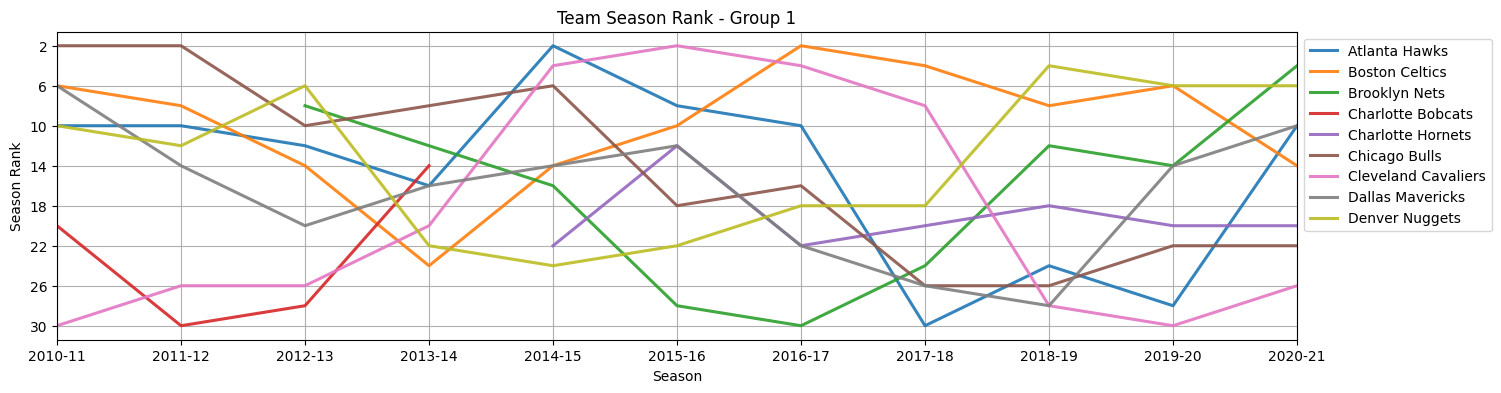

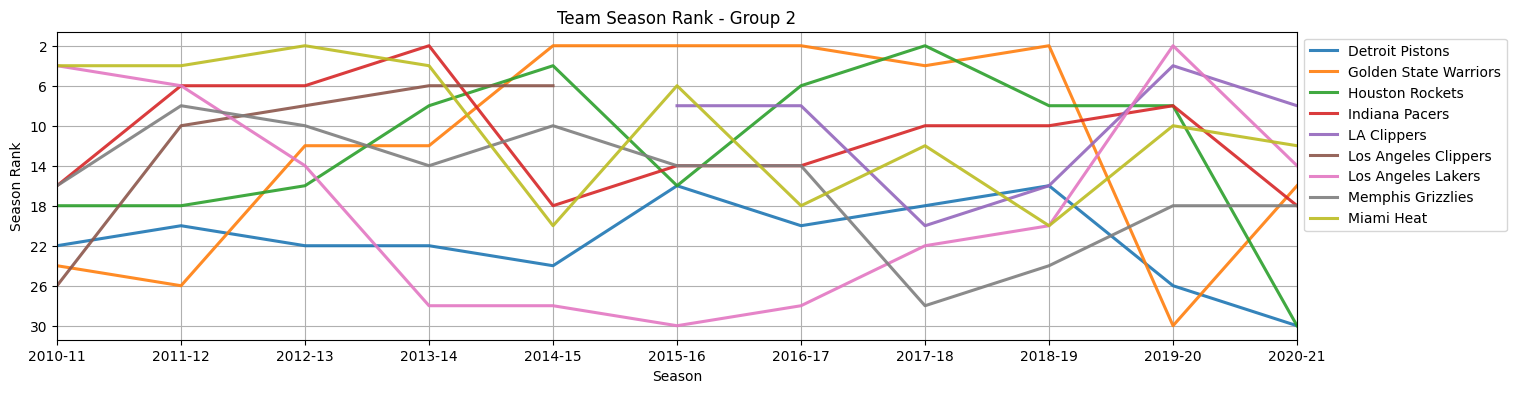

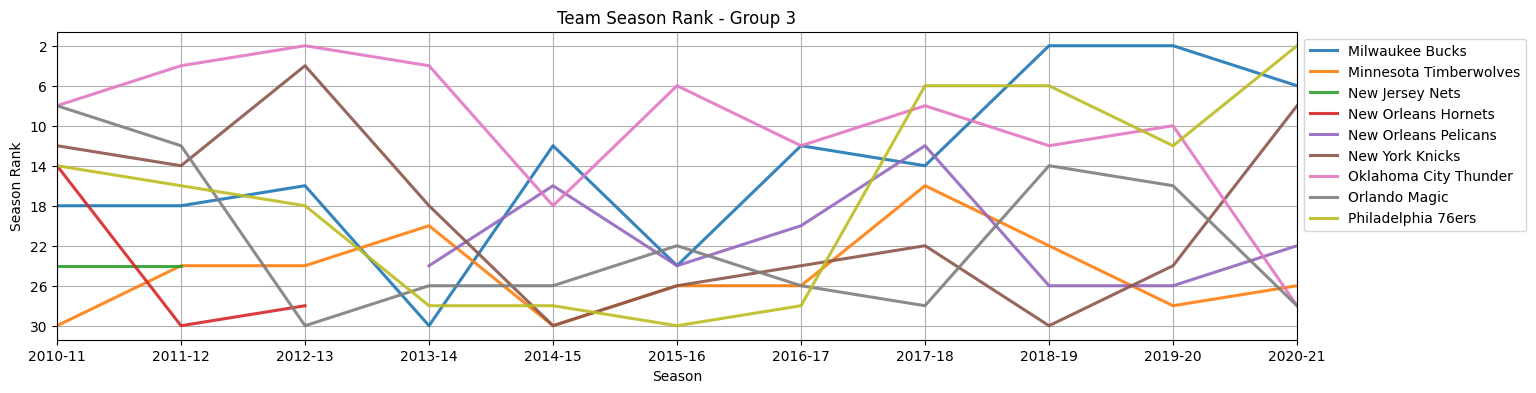

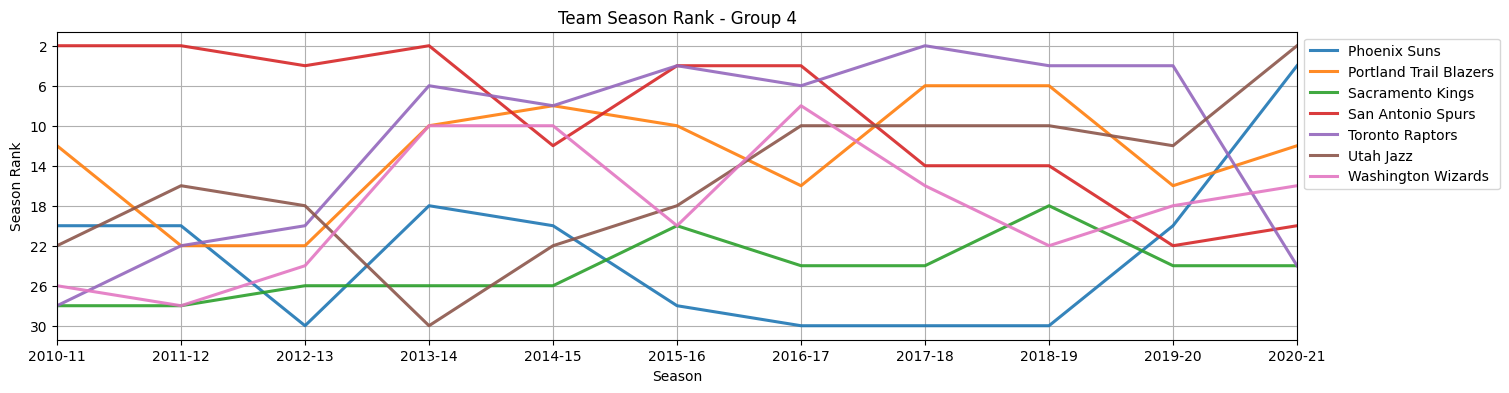

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
#Sorts the dataframe such that the teams and the seasons are in ascending order
df_sorted = season_rankings_all.sort_values(by=['Team', 'Season', 'Rank'], ascending=[True, True, False])
#Only takes the teams column in the dataframe and removes duplicates
unique_teams = df_sorted['Team'].unique()
#Gets the number of teams when splitted to 4 groups
teams_per_group = math.ceil(len(unique_teams) / 4)
#Gets the minimum and maximum season
min_season = df_sorted['Season'].min()
max_season = df_sorted['Season'].max()
#Loops through the 4 groups
for i in range(4):
    #Creates a figure space
    plt.figure(figsize=(16, 4))
    #Goes through each team in the group and filters the dataframe such that it only has each teams data and plots it in a line graph
    for team in unique_teams[i * teams_per_group: (i + 1) * teams_per_group]:
        team_data = df_sorted[df_sorted['Team'] == team]
        plt.plot(team_data['Season'], team_data['Rank'], label=team, linestyle='-', linewidth=2.2, alpha=0.9)
   # Adds labels on the graph and adjust some values on the labels
    plt.title(f'Team Season Rank - Group {i + 1}')
    plt.xlabel('Season')
    plt.ylabel('Season Rank')
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
    plt.grid(True)
    plt.gca().invert_yaxis()
    plt.yticks(range(2, max(df_sorted['Rank']) + 2, 4))

    plt.xlim(min_season, max_season)

    plt.show()

# lines that are not continous means team either renamed or disbanded.


GetNBAStats function retrieves and organizes NBA team statistics for a given team and season. The function uses the teamdashboardbygeneralsplits module to fetch general team information, such as win percentage (W_PCT), field goal percentage (FG_PCT), three-point percentage (FG3_PCT), free throw percentage (FT_PCT), points per game (PTS), rebounds per game (REB), assists per game (AST), turnovers per game (TOV), steals per game (STL), and blocks per game (BLK). Additionally, the function checks if the team has a playoff rank for the specified season. If a playoff rank is available, it is included in the returned statistics; otherwise, it checks for the regular season rank. If no rank information is found, a default rank of 25 is assigned. The function then returns a dictionary containing the extracted statistics and the determined rank.

On the other hand, the GetAllStats function compiles NBA team statistics across multiple seasons for all teams. It initializes an empty list all_stats to store the statistics. The function then iterates through each combination of teams and seasons by nested loops over the keys of the teams dictionary and a predefined list of season keys. For each combination, it calls the GetNBAStats function to retrieve the team statistics for that specific team and season and appends the result to the all_stats.

In [ ]:
def GetNBAStats(team, season):
  generalTeamInfo = teamdashboardbygeneralsplits.TeamDashboardByGeneralSplits(team_id=teams[team], per_mode_detailed='Per100Possessions', season=season, timeout=200) # calls the API function to get the team information
  generalTeamDict = generalTeamInfo.get_normalized_dict() # gets a normalized dictionary of the team info
  generalTeamDashboard = generalTeamDict['OverallTeamDashboard'][0] # gets the first dashboard in the data

  playoff_check = playoffDf[playoffDf['Team'] == team]
  playoff_check = playoff_check[playoff_check['Season'] == season]

  if not playoff_check.empty:
    playoff_result = playoff_check['Rank'].iloc[0] # checks if the team made the playoff
  else:
    playoff_result = 25 # did not make playoffs

  season_check = season_rankings_all[season_rankings_all['Team'] == team]
  season_check = season_check[season_check['Season'] == season]


  if not season_check.empty:
    season_rank = season_check['Rank'].iloc[0] #checks if the team is in the table
  else:
    season_rank = 15 # set to 15 if somehow cant find team in table (team changed name/ or disbanded)

  # Compiles NBA team statistics across multiple seasons for all teams in a dictionary
  stats = {'TEAM': team,
           'SEASON': season,
            'W_PCT': generalTeamDashboard['W_PCT'],
            'FG_PCT': generalTeamDashboard['FG_PCT'],
            'FG3_PCT': generalTeamDashboard['FG3_PCT'],
            'FT_PCT': generalTeamDashboard['FT_PCT'],
            'PTS': generalTeamDashboard['PTS'],
            'REB': generalTeamDashboard['REB'],
            'AST': generalTeamDashboard['AST'],
            'TOV': generalTeamDashboard['TOV'],
            'STL': generalTeamDashboard['STL'],
            'BLK': generalTeamDashboard['BLK'],
            'Playoff Result': playoff_result,
            'Season Rank': season_rank}
  return stats

def GetAllStats():
  all_stats = []
  team_keys = list(teams.keys()) # Gets all the ids from each team in the NBA API and makes it to a list
  season_keys = ['2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20', '2020-21'] # The seasons where the data would come from
  for team_k in team_keys:
    for season_k in season_keys:
      all_stats.append(GetNBAStats(team_k, season_k))
  return pd.DataFrame(all_stats)
# assigns the returned data frame a variable and sorts it.
allTeamStatsDf = GetAllStats()
allTeamStatsDf.sort_values(by=['TEAM'])
display(allTeamStatsDf)

## if data doesnt load just uncomment the code
# url = 'https://raw.githubusercontent.com/Louis-Miguel/NBA-Data-Repository/main/mydata.csv'
# df1 = pd.read_csv(url)
# allTeamStatsDf = df1
# display(allTeamStatsDf)

,TEAM,SEASON,W_PCT,FG_PCT,FG3_PCT,FT_PCT,PTS,REB,AST,TOV,STL,BLK,Playoff Result,Season Rank
0,Atlanta Hawks,2011-12,0.606,0.454,0.370,0.740,104.2,44.4,24.2,15.1,8.8,5.0,12.5,10
1,Atlanta Hawks,2012-13,0.537,0.464,0.371,0.715,103.7,43.3,25.9,15.7,8.6,4.8,12.5,12
2,Atlanta Hawks,2013-14,0.463,0.458,0.363,0.781,104.9,41.5,25.9,15.9,8.6,4.1,12.5,16
3,Atlanta Hawks,2014-15,0.732,0.466,0.380,0.778,108.2,42.8,27.2,15.0,9.6,4.9,3.5,2
4,Atlanta Hawks,2015-16,0.585,0.458,0.350,0.783,104.6,42.8,26.1,15.2,9.3,6.0,6.5,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,Washington Wizards,2016-17,0.598,0.475,0.372,0.784,110.4,43.3,24.1,14.3,8.5,4.1,6.5,8
336,Washington Wizards,2017-18,0.524,0.467,0.375,0.772,108.1,43.7,25.5,14.8,8.0,4.4,12.5,16
337,Washington Wizards,2018-19,0.390,0.468,0.341,0.768,110.2,40.9,25.4,13.6,8.0,4.5,25.0,22
338,Washington Wizards,2019-20,0.347,0.457,0.368,0.788,110.2,40.5,24.1,13.6,7.7,4.1,25.0,18


The PredictPlayoffResults function takes allTeamStatsDf data as input, extracts specific statistical features (stats) and the target variable (Playoff Rank), and splits the data into training and testing sets using the train_test_split.

The PredictSeasonRankings functions also takes allTeamStatsDf data as input, adds a new column (Next Season Rank) and gets the next season rank based on the season rank of the team on the following year. The latest year with no next season rank is then cut from the dataset to ensure all the data have a next season rank.

The LogisticReg, LinearReg, and RandomForestClassifier functions apply logistic regression, linear regression, and a random forest classifier, respectively, to the processed data. Each of these functions uses the training and testing sets obtained from ProcessData and evaluates the model's performance.

The LinearReg function initializes a linear regression model, fits it to the training data (x_train and y_train), and makes predictions on the test data (x_test). The function calculates the mean squared error (MSE) between the actual playoff ranks/next season ranks (y_test) and the predicted ranks (predictions). The MSE is a measure of the average squared difference between predicted and actual values, providing a quantitative assessment of the model's accuracy. The function prints the calculated MSE and returns the actual ranks (y_test) and the corresponding predictions(predictions) for further analysis or evaluation.

The LogisticReg function first processes the y data (y_train, y_test) such that it would fit for the logistic regression model initialized later. Then, the model fits it with training data(x_train and y_train), and make a prediction using the test data(x_test). The function calculates accuracy score, between the predicted ranks and the actual ranks. Afterward, it would print the accuracy score and return actual ranks (y_test) and the corresponding predictions (predictions) for further analysis or evaluation. In this code below, a classification report would also be used for the logistic regression data.

The RandomForest function first processes the y data (y_train, y_test) such that it would fit for the random forest model initialized later. Then, the model fits it with training data(x_train and y_train), and make a prediction using the test data(x_test). The function calculates accuracy score, between the predicted ranks and the actual ranks. Afterward, it would print the accuracy score and classification report.Lastly, The actual ranks (y_test) and the corresponding predictions (predictions) would be returned for further analysis or evaluation.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import utils
from IPython.core.display import display, HTML

# Function to print with a specific font size
def print_large(text, font_size=24):
    html_text = f"<div style='font-size: {font_size}px; font-weight: bold;'>{text} <br> </div>"
    display(HTML("<br>"))
    display(HTML(html_text))
    display(HTML("<br>"))

#Function that splits the data set for training in predicting playoff results
def PredictPlayoffResults(dataset):

  stats = ['W_PCT', 'FG_PCT', 'FG3_PCT', 'FT_PCT', 'PTS', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'Season Rank']

  x = dataset[stats]
  y = dataset[["Playoff Result"]]

  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
  return x_train, x_test, y_train, y_test

#Function that splits the data set for training in predicting the next season rank
def PredictSeasonRankings(dataset):

  stats = ['W_PCT', 'FG_PCT', 'FG3_PCT', 'FT_PCT', 'PTS', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'Season Rank']

  dataset['Next Season Rank'] = dataset['Season Rank'].shift(-1) #shifts the sorted season rank dataset such that the next season rank is the next season
  dataset = dataset[:-1]  #remove the last term in the data set
  mask = dataset['SEASON'] == '2020-21' #removes the latest season
  dataset = dataset[~mask]
  x = dataset[stats]

  y = dataset[["Next Season Rank"]]

  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
  return x_train, x_test, y_train, y_test

#Function that uses linear regression model to make a prediction and shows the mean squared error and r2 score
def LinearReg(data):
  x_train, x_test, y_train, y_test = data
  #initializes the model and makes a prediction
  model = LinearRegression()
  model.fit(x_train, y_train)
  predictions = model.predict(x_test)

  mse = mean_squared_error(y_test, predictions)
  print(f"Mean Squared Error: {mse}")
  r2 = r2_score(y_test, predictions)
  print(f"R2 Score: {r2}")
  return y_test, predictions

#Function that uses logistic regression model to make a prediction and shows the accuracy
def LogisticReg(data):
  x_train, x_test, y_train, y_test = data
  y_train = np.ravel(y_train)
  # transforms the y values to fit the logistic regression model
  lab = preprocessing.LabelEncoder()
  y_train = lab.fit_transform(y_train)
  y_test = np.ravel(y_test)
  lab = preprocessing.LabelEncoder()
  y_test = lab.fit_transform(y_test)
  #initializes the model and makes a prediction
  model = LogisticRegression(penalty='l1', C=0.01, solver='liblinear')
  model.fit(x_train, y_train)
  predictions = model.predict(x_test)

  accuracy = accuracy_score(y_test, predictions)
  print(f"Accuracy: {accuracy}")

  return y_test, predictions

#Function that uses random forest model to make a prediction and shows the accuracy and classification report
def RandomForest(data, target_arr):
  x_train, x_test, y_train, y_test = data
  # transforms the y values to fit the random forest model
  label_encoder = LabelEncoder()
  y_train_encoded = label_encoder.fit_transform(y_train.values.flatten())  # Use .values.flatten() to convert to 1D array
  y_test_encoded = label_encoder.transform(y_test.values.flatten())
  #initializes the model and makes a prediction
  model = RandomForestClassifier()
  model.fit(x_train, y_train_encoded)
  predictions = model.predict(x_test)

  accuracy = accuracy_score(y_test_encoded, predictions)
  print(f"Accuracy: {accuracy}")
  print(classification_report(y_test_encoded, predictions, zero_division=1, target_names= target_arr))
  return y_test, predictions

# Linear Regression
print_large("\nLinear Regression - Predict Playoff Results: \n")
linear_reg_playoff_test, linear_reg_playoff_prediction = LinearReg(PredictPlayoffResults(allTeamStatsDf))
print_large("\nLinear Regression - Predict Season Rankings: \n")
linear_reg_season_test, linear_reg_season_prediction = LinearReg(PredictSeasonRankings(allTeamStatsDf))

# Logistic Regression
print_large("\nLogistic Regression - Predict Playoff Results: \n")
logistic_reg_playoff_test, logistic_reg_playoff_prediction = LogisticReg(PredictPlayoffResults(allTeamStatsDf))
print("Classification Report:")
print(classification_report(logistic_reg_playoff_test, logistic_reg_playoff_prediction, zero_division=1, target_names= ['1', '2', '3.5', '6.5', '12.5', '25']))

print_large("\nLogistic Regression - Predict Season Rankings: \n")
logistic_reg_season_test, logistic_reg_season_prediction = LogisticReg(PredictSeasonRankings(allTeamStatsDf))
print("Classification Report:")
print(classification_report(logistic_reg_season_test, logistic_reg_season_prediction, zero_division=1, target_names= ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14',]))

# Random Forest
print_large("\nRandom Forest - Predict Playoff Results: \n")
random_forest_playoff_test, random_forest_playoff_prediction = RandomForest(PredictPlayoffResults(allTeamStatsDf), ['1', '2', '3.5', '6.5', '12.5', '25'])

print_large("\nRandom Forest - Predict Season Rankings: \n")
random_forest_season_test, random_forest_season_prediction = RandomForest(PredictSeasonRankings(allTeamStatsDf), ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16'])

Mean Squared Error: 23.261683668306503
R2 Score: 0.7297402598468592


Mean Squared Error: 49.79346220645626
R2 Score: 0.24420707942437625


Accuracy: 0.4852941176470588
Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.00      0.00         2
           2       1.00      0.00      0.00         3
         3.5       1.00      0.00      0.00         8
         6.5       1.00      0.00      0.00        10
        12.5       0.11      0.21      0.15        14
          25       0.73      0.97      0.83        31

    accuracy                           0.49        68
   macro avg       0.81      0.20      0.16        68
weighted avg       0.69      0.49      0.41        68



Accuracy: 0.016129032258064516
Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.00      0.00         6
           2       1.00      0.00      0.00         6
           3       1.00      0.00      0.00         5
           4       1.00      0.00      0.00         2
           5       1.00      0.00      0.00         5
           6       1.00      0.00      0.00         7
           7       1.00      0.00      0.00         8
           8       0.02      1.00      0.03         1
           9       1.00      0.00      0.00         6
          10       1.00      0.00      0.00         1
          11       1.00      0.00      0.00         5
          12       1.00      0.00      0.00         2
          13       1.00      0.00      0.00         5
          14       1.00      0.00      0.00         3

    accuracy                           0.02        62
   macro avg       0.93      0.07      0.00        62
weighted avg       0.98   

Accuracy: 0.6323529411764706
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       1.00      0.00      0.00         3
         3.5       0.00      0.00      0.00         8
         6.5       0.33      0.30      0.32        10
        12.5       0.52      0.86      0.65        14
          25       0.93      0.90      0.92        31

    accuracy                           0.63        68
   macro avg       0.46      0.34      0.31        68
weighted avg       0.63      0.63      0.60        68



Accuracy: 0.14516129032258066
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         6
           3       0.00      1.00      0.00         0
           4       0.33      0.20      0.25         5
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         5
           7       0.50      0.14      0.22         7
           8       0.57      0.50      0.53         8
           9       0.00      0.00      0.00         1
          10       0.50      0.17      0.25         6
          11       0.00      0.00      0.00         1
          12       0.50      0.20      0.29         5
          13       0.00      0.00      0.00         2
          14       0.00      1.00      0.00         0
          15       0.50      0.20      0.29         5
          16       1.00      0.00      0.00         3

    accuracy                           0.15       

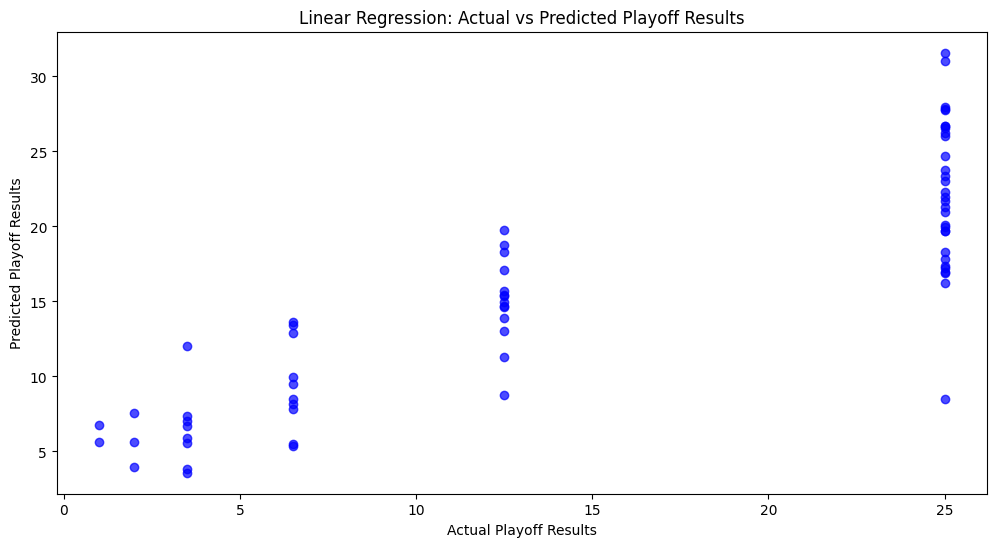

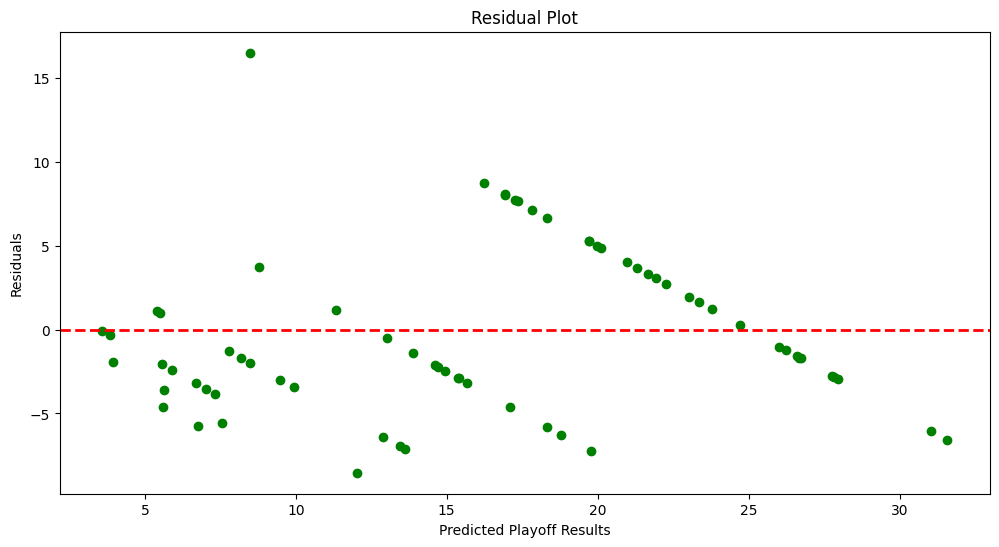

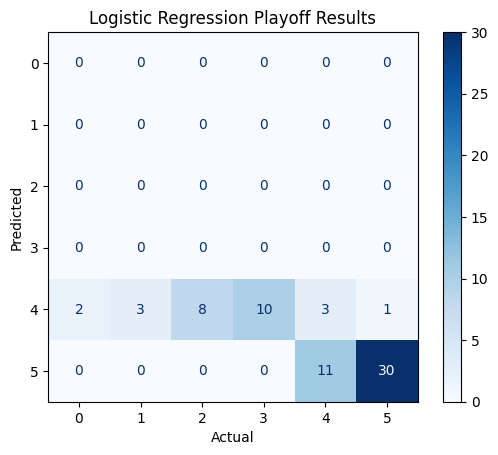

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
# Scatter plot for actual vs predicted playoff wins
print_large("Predict Playoff Results: Linear Regression")
plt.figure(figsize=(12, 6))
plt.scatter(linear_reg_playoff_test, linear_reg_playoff_prediction, alpha=0.7, color='blue')
plt.title('Linear Regression: Actual vs Predicted Playoff Results')
plt.xlabel('Actual Playoff Results')
plt.ylabel('Predicted Playoff Results')
plt.show()

# Residual plot using matplotlib
residuals = linear_reg_playoff_test - linear_reg_playoff_prediction
plt.figure(figsize=(12, 6))
plt.scatter(linear_reg_playoff_prediction, residuals, color='green')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residual Plot')
plt.xlabel('Predicted Playoff Results')
plt.ylabel('Residuals')
plt.show()

print_large("Predict Playoff Results: Logistic Regression")
confusion_matrix = metrics.confusion_matrix(logistic_reg_playoff_prediction, logistic_reg_playoff_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot(cmap="Blues", values_format="d")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Logistic Regression Playoff Results')
plt.show()


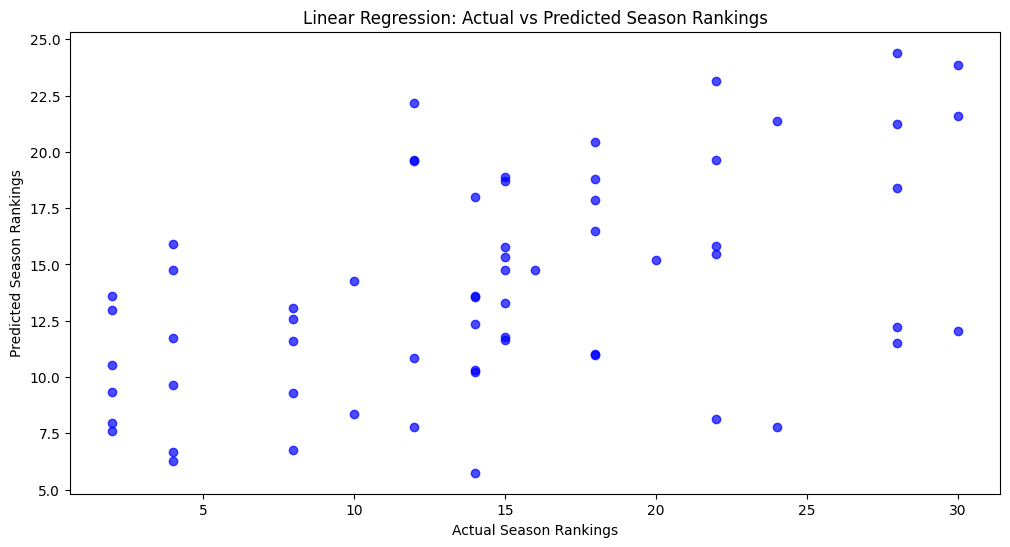

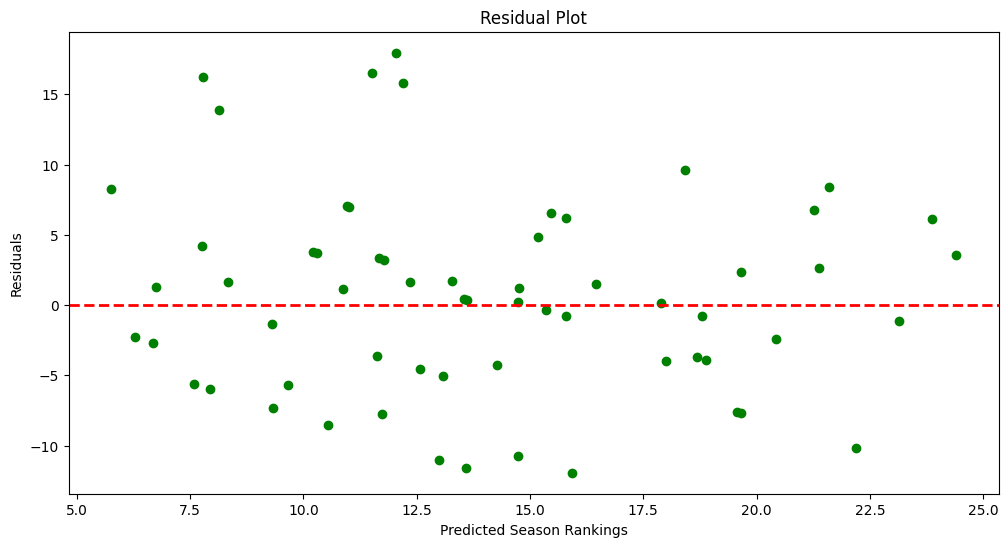

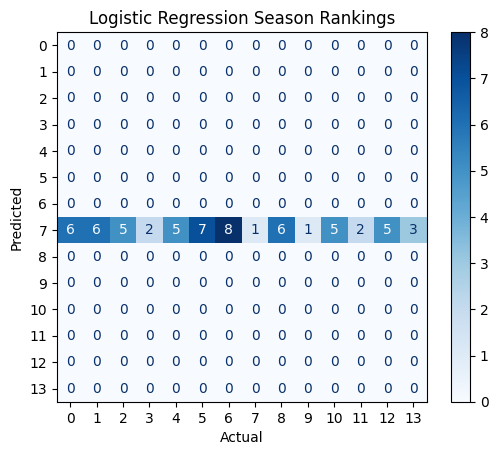

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics

# Scatter plot for actual vs predicted season rankingss
print_large("Predict Season Rankings: Linear Regression")
plt.figure(figsize=(12, 6))
plt.scatter(linear_reg_season_test, linear_reg_season_prediction, alpha=0.7, color='blue')
plt.title('Linear Regression: Actual vs Predicted Season Rankings')
plt.xlabel('Actual Season Rankings')
plt.ylabel('Predicted Season Rankings')
plt.show()

# Residual plot using matplotlib
residuals = linear_reg_season_test - linear_reg_season_prediction
plt.figure(figsize=(12, 6))
plt.scatter(linear_reg_season_prediction, residuals, color='green')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residual Plot')
plt.xlabel('Predicted Season Rankings')
plt.ylabel('Residuals')
plt.show()


print_large("Predict Season Rankings: Logistic Regression")
confusion_matrix = metrics.confusion_matrix(logistic_reg_season_prediction, logistic_reg_season_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot(cmap="Blues", values_format="d")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Logistic Regression Season Rankings')
plt.show()


# Pertinent Links

Paper: https://docs.google.com/document/d/11vwGiCy6Oyx-8TjpwUUgZKU0tqxmfF4GZzdCiRG47Zs/edit?usp=sharing

API used: https://github.com/swar/nba_api


